In [2]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [3]:
# Reading the data
df = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived')

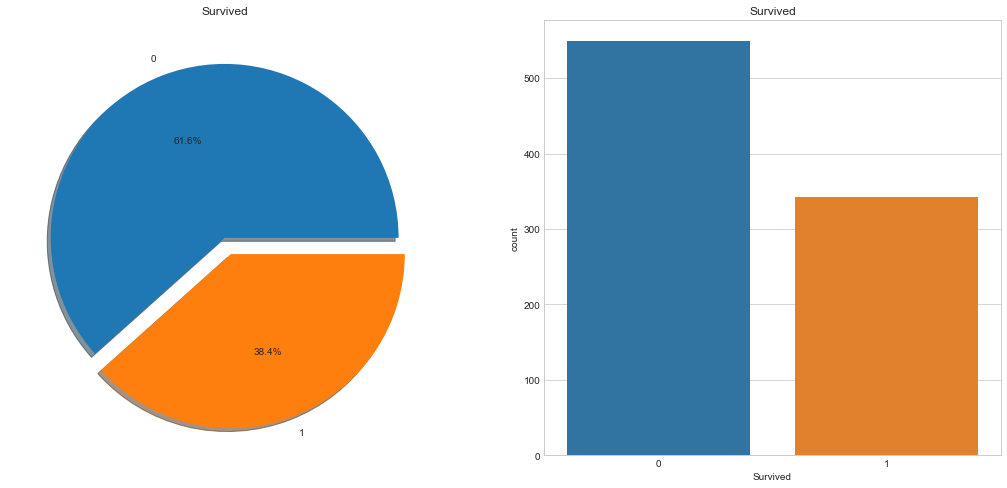

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')

Overall Probability of Survival ~ 38%

## Pre-processing, EDA and Feature Generation

### Handling Missing Values

## Handling Age First

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We see that the Pclass column has the maximum absolute correlation with our target class Survived.

In [10]:
df.corr()['Pclass'].sort_values()

Fare          -0.549500
Age           -0.369226
Survived      -0.338481
PassengerId   -0.035144
Parch          0.018443
SibSp          0.083081
Pclass         1.000000
Name: Pclass, dtype: float64

In [11]:
age_by_pclass_sex= df.groupby(['Sex','Pclass']).median()['Age']

In [12]:
age_by_pclass_sex

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [13]:
median_all = df['Age'].median()
median_all

28.0

In [14]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Let's jump to Embarked

In [16]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

only two values are missing!

In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Let's Handle Cabin

We have (891-204) = 687 missing Cabin values

In [18]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that there are many missing values thus we replace the missing values by a new class M (missing), plus we have cabins with different classes followed by numbers, thus we can just keep the classes.

In [19]:
df['Cabin']=df['Cabin'].fillna('M')

In [20]:
df['Cabin']=df['Cabin'].apply(lambda str: str[0])

In [21]:
df.loc[df[df['Cabin']=='T'].index,'Cabin']='A'

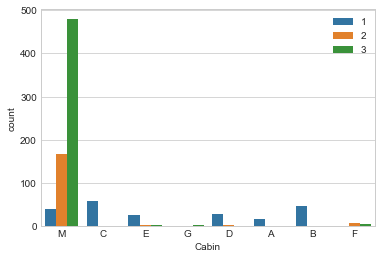

In [22]:
g = sns.countplot(x='Cabin',data=df,hue='Pclass', )
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

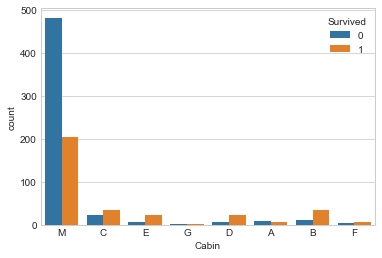

In [23]:
sns.countplot(x='Cabin',data=df,hue='Survived')

On visualizing the final Cabin column we see that most of the people in the missing class belong to the Pclass 3 and have little chance of survival. We see a higher chance of survival in most of the other cabin classes, with the least being in cabin A and the highest chance being in the cabin class B. We also observe that most of the people in the classes C, E, G, D, A, B belong ot the Pclass 1, and have high chances of survival, thus indicating that Pclass might be a factor resulting in higher chances of survival.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA and Feature Generation

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

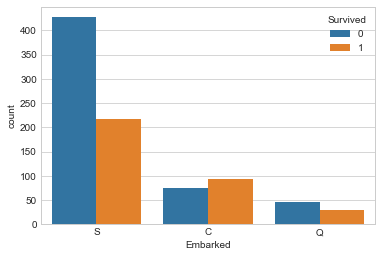

In [26]:
sns.countplot(x='Embarked',data=df,hue='Survived')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\Anaconda3\lib\site-packages\sea

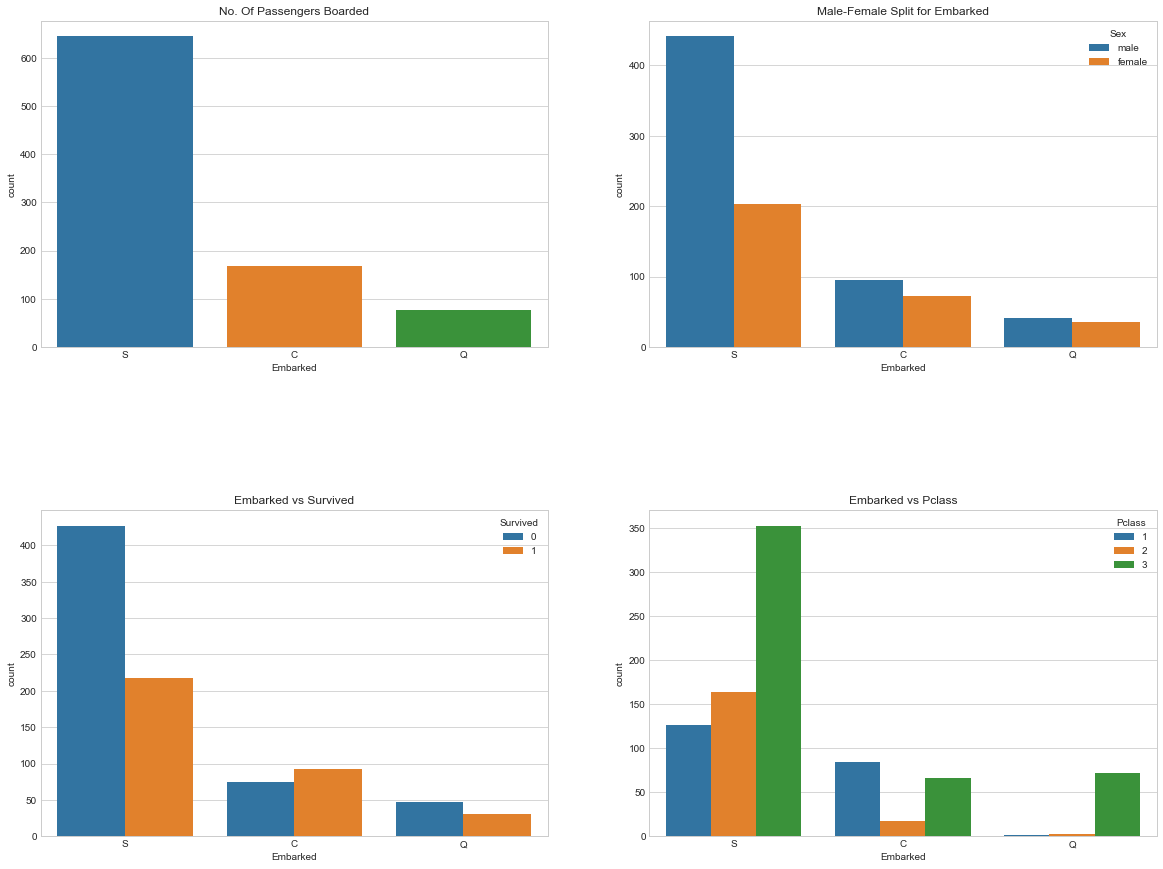

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

In [28]:
df['Ticket_Frequency']=df.groupby('Ticket')['Ticket'].transform('count')

<AxesSubplot:xlabel='Ticket_Frequency', ylabel='count'>

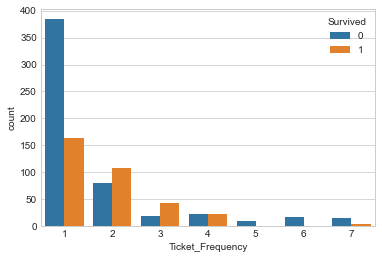

In [29]:
sns.countplot(x='Ticket_Frequency',data=df,hue='Survived')

On careful observation we see that different ticket frequency has different rates of survival with the highest being for the group of two and the chance for groups of more than 4 being very less.

In [30]:
df['Title']=df['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

In [31]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

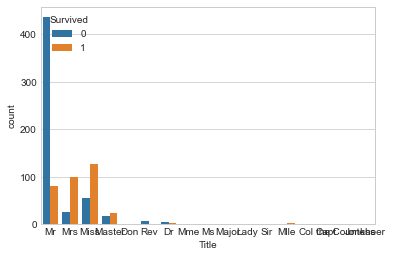

In [32]:
sns.countplot(x='Title',data=df,hue='Survived')

In [33]:
df['IsMarried']=0

In [34]:
df['IsMarried'].loc[df['Title']=='Mrs']=1

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
df['IsMarried'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='IsMarried', ylabel='count'>

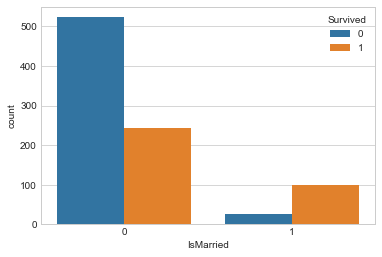

In [36]:
sns.countplot(x='IsMarried',data=df,hue='Survived')

We created a new feature called IsMarried that is checked for title Mrs.
We see that being married has a greater chance of survival !

In [37]:
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss_Mrs_Ms')

In [38]:
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Others')

<AxesSubplot:xlabel='Title', ylabel='count'>

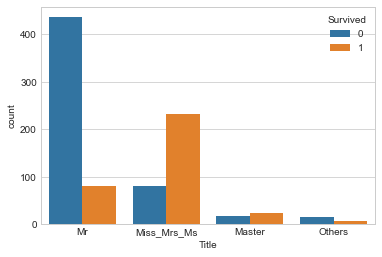

In [39]:
sns.countplot(x='Title',data=df,hue='Survived')

<AxesSubplot:xlabel='Title', ylabel='Age'>

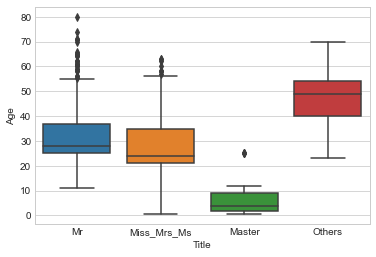

In [40]:
sns.boxplot(x='Title', y='Age', data=df)

1. We converted Title into 4 groups.
2. We can see most of the people are from Mr. grp where the probability of surviving is low while the probability of Miss_Mrs_Ms and Master is higher for surviving.
3. We have very less people belonging to the other classes.

In [41]:
df['Child']=0

In [42]:
df['Child'].loc[df['Age']<18]=1

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
df['Child'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Child', ylabel='count'>

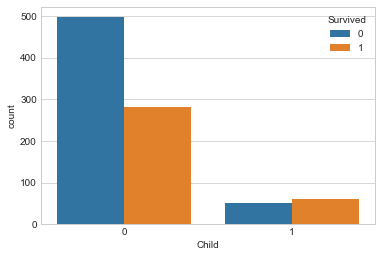

In [44]:
sns.countplot(x='Child',data=df,hue='Survived')

We created a Child feature for people below 18 years of age, now we can see that children have a higher chance of getting out !

We create a new feature Family size, which is essentialy No. of Parents + Chilren + Siblings + Spouse + 1

In [45]:
df['Fam_Size']=df['Parch']+df['SibSp']+1

<AxesSubplot:xlabel='Fam_Size', ylabel='count'>

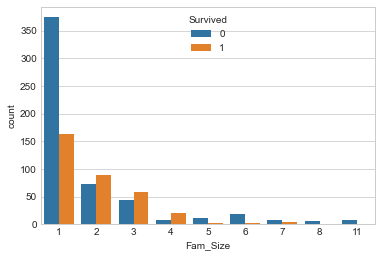

In [46]:
sns.countplot(x='Fam_Size',data=df,hue='Survived')

In [47]:
df.loc[:,'FsizeD']='Alone'

In [48]:
df.loc[(df['Fam_Size']>1),'FsizeD']='Small'

In [49]:
df.loc[(df['Fam_Size']>4),'FsizeD']='Big'

Now we create three different categories of Family Size

<AxesSubplot:xlabel='FsizeD', ylabel='count'>

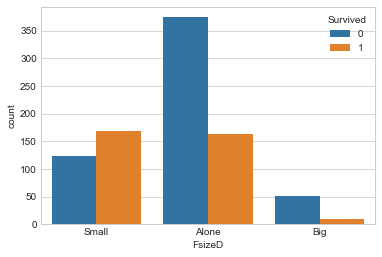

In [50]:
sns.countplot(x='FsizeD',data=df,hue='Survived')

We see that people with small family size have the highest chance of Surviving, and the ones with a big family, which the lease chance !

In [51]:
df=df.drop(['Name','Ticket','Fam_Size'],axis=1)

In [52]:
df=df.drop(['PassengerId'],axis=1)

## Visualization

<AxesSubplot:xlabel='Pclass', ylabel='count'>

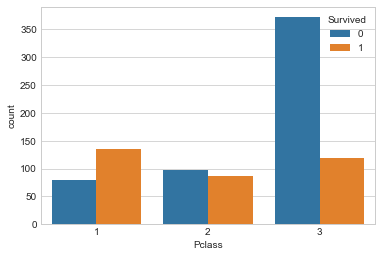

In [53]:
sns.countplot(x='Pclass',data=df,hue='Survived')

We see that the people belonging to the Pclass 1 have a higher chance of survival, which keeps on decreasing as we go down the classes !

<AxesSubplot:xlabel='Sex', ylabel='count'>

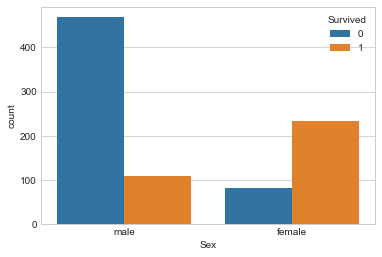

In [54]:
sns.countplot(x='Sex',data=df,hue='Survived')

1. Proportion of male and female: ~2/3 vs ~1/3
2. Male is much less likely to survive, with only 20% chance of survival. For female, >70% chance of survival.
3. Obviously, Sex is an important feature to predict survival.

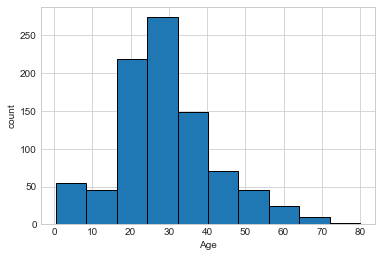

In [55]:
plt.hist(df.Age, edgecolor="black")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

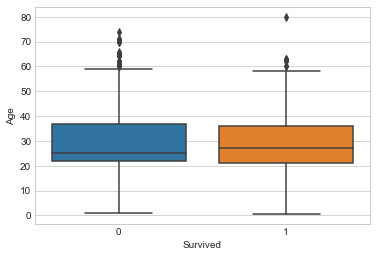

In [56]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

1. Passengers are mainly aged 20–40.
2. Younger passengers tends to survive.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

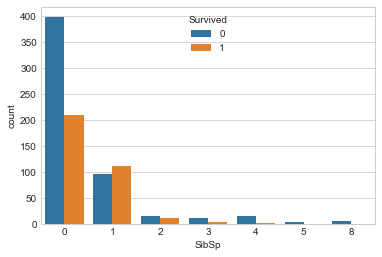

In [57]:
sns.countplot(x='SibSp',data=df,hue='Survived')

1. Most of the passengers are travelling alone
2. The ones with 1 sibling/spouse are more likely to survive

<AxesSubplot:xlabel='Parch', ylabel='count'>

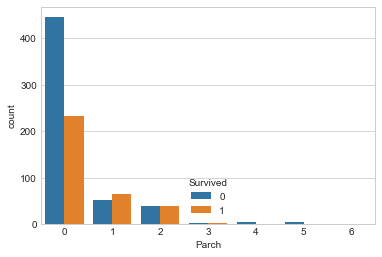

In [58]:
sns.countplot(x='Parch',data=df,hue='Survived')

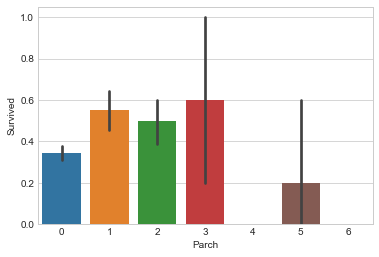

In [59]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.show()

1. ~ >70% passengers travel without parents/children.
2. Passengers travelling with parents/children are more likely to survive than those not.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


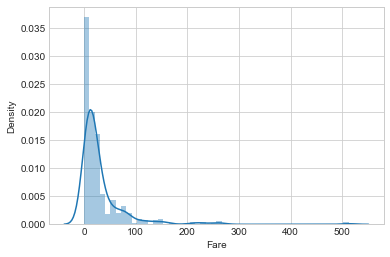

In [60]:
sns.distplot(df.Fare)
plt.show()

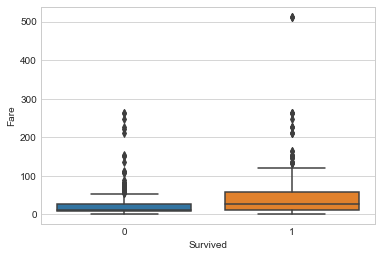

In [61]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()

1. We see that there are people paying too much for their tickets (outliers)
2. We see that people with higher fares are likely to survive !

<AxesSubplot:xlabel='Embarked', ylabel='count'>

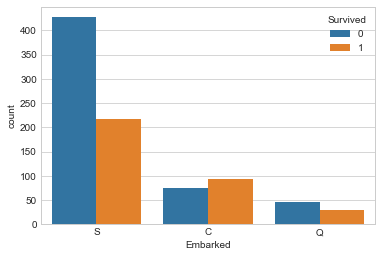

In [62]:
sns.countplot(x='Embarked',data=df,hue='Survived')

1. We see most of the people were embarked from the port S
2. People embarked from the C port are more likely to survive !

In [63]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4

In [64]:
df['Fare_Range']=pd.qcut(df['Fare'],4)

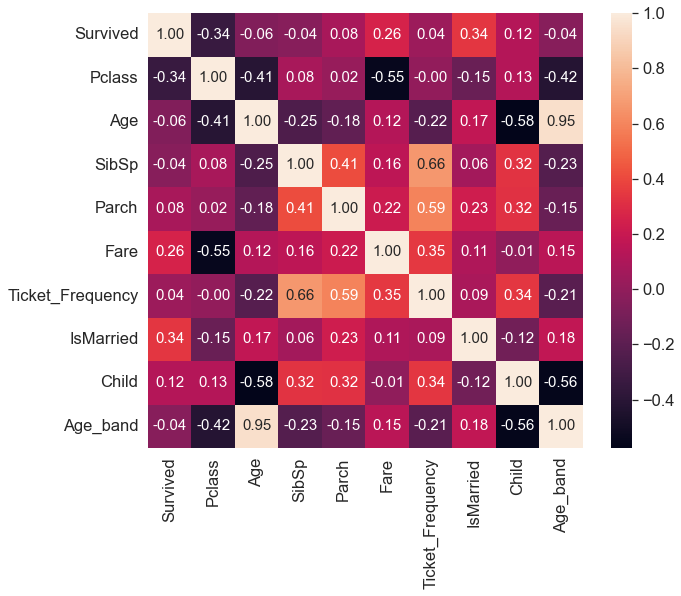

In [65]:
cm = df.corr()
sns.set(font_scale=1.5, )
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size':15})
      #          yticklabels=cols, xticklabels=cols)

fig = plt.gcf()
fig.set_size_inches(10,8)

### Converting into Dummies

In [66]:
dummies = pd.get_dummies(df['Embarked'],drop_first=True)

df = pd.concat([df.drop('Embarked',axis=1),dummies],axis=1)

In [67]:
dummies = pd.get_dummies(df['Cabin'],drop_first=True)

df = pd.concat([df.drop('Cabin',axis=1),dummies],axis=1)

In [68]:
dummies = pd.get_dummies(df['Sex'],drop_first=True)

df = pd.concat([df.drop('Sex',axis=1),dummies],axis=1)

In [69]:
dummies = pd.get_dummies(df['Title'],drop_first=True)

df = pd.concat([df.drop('Title',axis=1),dummies],axis=1)

In [70]:
dummies = pd.get_dummies(df['FsizeD'],drop_first=True)

df = pd.concat([df.drop('FsizeD',axis=1),dummies],axis=1)

In [71]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_Frequency,IsMarried,Child,Age_band,...,E,F,G,M,male,Miss_Mrs_Ms,Mr,Others,Big,Small
0,0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,1,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,2,...,0,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,2,1,0,2,...,0,0,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,2,...,0,0,0,1,1,0,1,0,0,0


<AxesSubplot:>

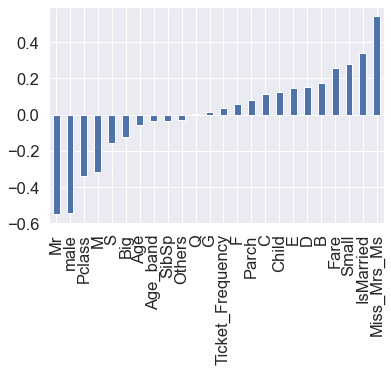

In [72]:
df.corr()['Survived'].sort_values().drop('Survived').plot(kind='bar')

In [73]:
df.isnull().sum()

Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Ticket_Frequency    0
IsMarried           0
Child               0
Age_band            0
Fare_Range          0
Q                   0
S                   0
B                   0
C                   0
D                   0
E                   0
F                   0
G                   0
M                   0
male                0
Miss_Mrs_Ms         0
Mr                  0
Others              0
Big                 0
Small               0
dtype: int64

In [74]:
df.drop('Age', axis = 1, inplace=True)

## Statistical Logistic Regression Modelling using Statsmodel Library

In [75]:
from sklearn.metrics import confusion_matrix, f1_score

In [76]:
df.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Ticket_Frequency',
       'IsMarried', 'Child', 'Age_band', 'Fare_Range', 'Q', 'S', 'B', 'C', 'D',
       'E', 'F', 'G', 'M', 'male', 'Miss_Mrs_Ms', 'Mr', 'Others', 'Big',
       'Small'],
      dtype='object')

In [77]:
res = ''
for i in df.columns:
    res += str(i) + ' + ' 
print(res)

Survived + Pclass + SibSp + Parch + Fare + Ticket_Frequency + IsMarried + Child + Age_band + Fare_Range + Q + S + B + C + D + E + F + G + M + male + Miss_Mrs_Ms + Mr + Others + Big + Small + 


In [78]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Ticket_Frequency,IsMarried,Child,Age_band,Fare_Range,...,E,F,G,M,male,Miss_Mrs_Ms,Mr,Others,Big,Small
0,0,3,1,0,7.2500,1,0,0,1,"(-0.001, 7.91]",...,0,0,0,1,1,0,1,0,0,1
1,1,1,1,0,71.2833,1,1,0,2,"(31.0, 512.329]",...,0,0,0,0,0,1,0,0,0,1
2,1,3,0,0,7.9250,1,0,0,1,"(7.91, 14.454]",...,0,0,0,1,0,1,0,0,0,0
3,1,1,1,0,53.1000,2,1,0,2,"(31.0, 512.329]",...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,0,8.0500,1,0,0,2,"(7.91, 14.454]",...,0,0,0,1,1,0,1,0,0,0


In [79]:
import statsmodels.formula.api as smf

m1 = smf.logit(
  formula='Survived ~ Pclass + SibSp + Parch + Ticket_Frequency + IsMarried + Child + Age_band + Fare_Range + Q + S + B + C + D + E + F + G + M + male + Mr + Others + Big + Small',
  data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.393608
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                           24
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.4089
Time:                        05:55:35   Log-Likelihood:                -350.70
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.920e-87
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 3.9991      0.931      4.297      0.000       2.175       5.823
Fare_Range[T.Interval(7.91, 14.454, closed='right')]      0.1753      0.318      0.552      0.581      -0.448       0.798
Fare_Range[T.Interval(14.454, 31.0, closed='right')]      0.4089      0.393      1.041      0.298      -0.361       1.179
Fare_Range[T.Interval(31.0, 512.329, closed='right')]     0.5037      0.542      0.929      0.353      -0.559       1.567
Pclass                                                   -0.7701      0.229     -3.357      0.001      -1.220      -0.320
SibSp                                                    -0.1094      0.227     -0.483      0.629      -0.554       0.335
Parch                                                     0.0651      0.228      0.285      0.775      -0.382       0.512
Ticket_Frequency                                          0.0699      0.129      0.543      0.587      -0.182       0.322
IsMarried                                                 0.5934      0.378      1.569      0.117      -0.148       1.335
Child                                                     0.0872      0.417      0.209      0.834      -0.729       0.904
Age_band                                                 -0.4638      0.174     -2.671      0.008      -0.804      -0.124
Q                                                        -0.0446      0.420     -0.106      0.915      -0.868       0.779
S                                                        -0.3810      0.260     -1.467      0.142      -0.890       0.128
B                                                         0.3840      0.713      0.539      0.590      -1.014       1.782
C                                                        -0.0901      0.672     -0.134      0.893      -1.406       1.226
D                                                         0.8875      0.751      1.181      0.238      -0.585       2.360
E                                                         1.0669      0.752      1.418      0.156      -0.407       2.541
F                                                         0.2211      1.102      0.201      0.841      -1.939       2.381
G                                                        -1.3949      1.255     -1.112      0.266      -3.854       1.064
M                                                        -0.4634      0.655     -0.707      0.479      -1.747       0.821
male                                                      0.2801      0.548      0.511      0.610      -0.795       1.355
Mr                                                       -3.2986      0.593     -5.566      0.000      -4.460      -2.137
Others                                                   -2.9690      0.775     -3.829      0.000      -4.489      -1.449
Big                                                      -3.1760     

In [80]:
X = df.drop(['Survived','Miss_Mrs_Ms', 'Fare'], axis = 1)

In [81]:
predictions = m1.predict(X)
thresholds = np.arange(0, 100)/100
best_thres = 0
best_score = 0
for thresh in thresholds:
    oofs_rounded = (predictions > thresh) * 1
    thresh_score = f1_score(df["Survived"], oofs_rounded)
    if thresh_score > best_score:
        best_score = thresh_score
        best_thres = thresh
print(f'Threshold {best_thres}: {best_score}')

Threshold 0.41: 0.7885714285714286


In [82]:
round_preds = (predictions > best_thres) * 1

In [83]:
print(confusion_matrix(df["Survived"], round_preds))

[[467  82]
 [ 66 276]]


Thus we have 492 True Negatives, 57 False Positives, 81 False Negatives, 261 True Positives

In [84]:
X.dtypes

Pclass                 int64
SibSp                  int64
Parch                  int64
Ticket_Frequency       int64
IsMarried              int64
Child                  int64
Age_band               int64
Fare_Range          category
Q                      uint8
S                      uint8
B                      uint8
C                      uint8
D                      uint8
E                      uint8
F                      uint8
G                      uint8
M                      uint8
male                   uint8
Mr                     uint8
Others                 uint8
Big                    uint8
Small                  uint8
dtype: object

## Updates

In [85]:
# Create new feature Age_band*Pclass

df['Age_Class'] = df['Pclass']*df['Age_band']

### Upsampling & Downsampling

In [144]:
# Using resample to upsample and downsample to the minority class

from sklearn.utils import resample

X_train = df.drop(['Survived','Miss_Mrs_Ms', 'Fare'], axis = 1)
y_train = df['Survived']
# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
#print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (891, 23) (891,)
Upsampled shape: (1098, 23) (1098,)
Downsampled shape: (684, 23) (684,)


In [149]:
# Creating the upsampled and downsampled dataframes

X_train_u = pd.DataFrame(X_train_u, columns=X.columns)
X_train_d = pd.DataFrame(X_train_d, columns=X.columns, dtype=X.dtypes.values)
X_train_u['Survived'] = y_train_u
X_train_d['Survived'] = y_train_d
X_train_u['Fare_Range'] = X_train_u['Fare_Range'].astype('category')
X_train_d['Fare_Range'] = X_train_d['Fare_Range'].astype('category')

In [150]:
# Fitting on the upsampled data
m1 = smf.logit(
  formula='Survived ~ Pclass + SibSp + Parch + Ticket_Frequency + IsMarried + Child + Age_band + Fare_Range + Q + S + B + C + D + E + F + G + M + male + Mr + Others + Big + Small + Age_Class',
  data=X_train_u) \
.fit()

m1.summary()

         Current function value: 0.381698
         Iterations: 35


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1098
Model:                          Logit   Df Residuals:                     1047
Method:                           MLE   Df Model:                           50
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                  0.4493
Time:                        03:25:23   Log-Likelihood:                -419.10
converged:                      False   LL-Null:                       -761.08
Covariance Type:            nonrobust   LLR p-value:                3.453e-112
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.0938      1.500      0.729      0.466      -1.845       4.033
Pclass[T.2]                                               1.2351      1.469      0.841      0.400      -1.644       4.114
Pclass[T.3]                                              -0.5783      1.267     -0.456      0.648      -3.062       1.905
SibSp[T.1]                                               -0.0156      0.478     -0.033      0.974      -0.953       0.922
SibSp[T.2]                                                1.3456      0.720      1.868      0.062      -0.066       2.758
SibSp[T.3]                                                0.7408      1.232      0.601      0.548      -1.674       3.155
SibSp[T.4]                                                1.2711      1.297      0.980      0.327      -1.272       3.814
SibSp[T.5]                                                0.9788   7766.329      0.000      1.000   -1.52e+04    1.52e+04
SibSp[T.8]                                              -97.4643   1.04e+21  -9.39e-20      1.000   -2.04e+21    2.04e+21
Parch[T.1]                                               -0.5896      0.428     -1.379      0.168      -1.428       0.249
Parch[T.2]                                               -0.2703      0.590     -0.458      0.647      -1.427       0.887
Parch[T.3]                                                2.6476      1.649      1.606      0.108      -0.584       5.879
Parch[T.4]                                              -16.8059   1.17e+04     -0.001      0.999    -2.3e+04     2.3e+04
Parch[T.5]                                              -20.1932   3.67e+04     -0.001      1.000   -7.19e+04    7.18e+04
Parch[T.6]                                                1.0223    2.4e+04   4.27e-05      1.000    -4.7e+04     4.7e+04
Ticket_Frequency[T.2]                                    -0.0660      0.301     -0.219      0.826      -0.656       0.524
Ticket_Frequency[T.3]                                     0.2667      0.435      0.613      0.540      -0.587       1.120
Ticket_Frequency[T.4]                                     0.0999      0.590      0.169      0.866      -1.056       1.256
Ticket_Frequency[T.5]                                   -23.8209   4.38e+04     -0.001      1.000   -8.58e+04    8.57e+04
Ticket_Frequency[T.6]                                   -18.5631   4831.678     -0.004      0.997   -9488.477    9451.351
Ticket_Frequency[T.7]                                     1.7367      0.826      2.103      0.035       0.118       3.355
IsMarried[T.1]                                            0.6891      0.378      1.822      0.068      -0.052       1.430
Child[T.1]                                                1.8920      0.686      2.760      0.006       0.548       3.236
Age_band[T.1]                                             1.4812     

In [151]:
# Fitting on the downsampled data
m1 = smf.logit(
  formula='Survived ~ Pclass + SibSp + Parch + Ticket_Frequency + IsMarried + Child + Age_band + Fare_Range + Q + S + B + C + D + E + F + G + M + male + Mr + Others + Big + Small + Age_Class',
  data=X_train_d) \
.fit()

m1.summary()

         Current function value: 0.382638
         Iterations: 35


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  684
Model:                          Logit   Df Residuals:                      635
Method:                           MLE   Df Model:                           48
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                  0.4480
Time:                        03:25:25   Log-Likelihood:                -261.72
converged:                      False   LL-Null:                       -474.11
Covariance Type:            nonrobust   LLR p-value:                 8.355e-62
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                29.1405   7.77e+05   3.75e-05      1.000   -1.52e+06    1.52e+06
Pclass[T.2]                                             -25.3053   7.77e+05  -3.26e-05      1.000   -1.52e+06    1.52e+06
Pclass[T.3]                                             -26.9066   7.77e+05  -3.46e-05      1.000   -1.52e+06    1.52e+06
SibSp[T.1]                                                0.4606      0.624      0.738      0.461      -0.763       1.684
SibSp[T.2]                                                1.3198      0.950      1.389      0.165      -0.543       3.182
SibSp[T.3]                                                0.7750      1.727      0.449      0.654      -2.609       4.159
SibSp[T.4]                                                0.8682      1.870      0.464      0.642      -2.797       4.534
SibSp[T.5]                                               -1.8573   1.35e+04     -0.000      1.000   -2.65e+04    2.65e+04
Parch[T.1]                                               -0.2422      0.560     -0.432      0.665      -1.340       0.856
Parch[T.2]                                               -0.4156      0.741     -0.561      0.575      -1.869       1.037
Parch[T.3]                                                0.6588      1.923      0.343      0.732      -3.110       4.428
Parch[T.4]                                               -0.4481   8728.678  -5.13e-05      1.000   -1.71e+04    1.71e+04
Parch[T.5]                                                0.2163      2.198      0.098      0.922      -4.092       4.524
Ticket_Frequency[T.2]                                     0.0590      0.402      0.147      0.883      -0.730       0.847
Ticket_Frequency[T.3]                                     0.2407      0.514      0.468      0.640      -0.767       1.248
Ticket_Frequency[T.4]                                     1.4789      0.821      1.801      0.072      -0.131       3.088
Ticket_Frequency[T.5]                                   -26.6842   4.25e+05  -6.27e-05      1.000   -8.34e+05    8.34e+05
Ticket_Frequency[T.6]                                   -15.0687   1930.224     -0.008      0.994   -3798.238    3768.101
Ticket_Frequency[T.7]                                     1.9985      0.984      2.031      0.042       0.070       3.927
IsMarried[T.1]                                            1.1873      0.537      2.212      0.027       0.135       2.239
Child[T.1]                                                0.1094      1.137      0.096      0.923      -2.119       2.337
Age_band[T.1]                                            14.0224        nan        nan        nan         nan         nan
Age_band[T.2]                                           -11.4310        nan        nan        nan         nan         nan
Age_band[T.3]                                           -12.4506     